In [31]:
import pandas as pd
import warnings
import seaborn as sns

import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

warnings.filterwarnings('ignore')
import numpy as np



In [2]:
loan = pd.read_csv(r'C:\Users\user\Desktop\data-science-journey\Datasets\loan_dataset.csv')
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# check all the sum of missing values each columns

loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Data cleaning

In [6]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
# seeing the irregularites in the column names, we rename them

loan.rename(columns = {'ApplicantIncome': 'Applicant_Income', 'CoapplicantIncome': 'Co_applicant_Income', 'LoanAmount': 'Loan_Amount'}, inplace = True)
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co_applicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
# fill out the null values in the dataset

loan.isnull().sum()

Loan_ID                 0
Gender                 13
Married                 3
Dependents             15
Education               0
Self_Employed          32
Applicant_Income        0
Co_applicant_Income     0
Loan_Amount            22
Loan_Amount_Term       14
Credit_History         50
Property_Area           0
Loan_Status             0
dtype: int64

In [9]:
# fill the null values with bfill

loan['Gender'] = loan['Gender'].bfill()
loan['Married'] = loan['Married'].bfill()
loan['Dependents'] = loan['Dependents'].bfill()
loan['Self_Employed'] = loan['Self_Employed'].bfill()
loan['Loan_Amount'] = loan['Loan_Amount'].bfill()
loan['Loan_Amount_Term'] = loan['Loan_Amount_Term'].bfill()
loan['Credit_History'] = loan['Credit_History'].bfill()

In [10]:
# all null in each columns are successfully filled

loan.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
Applicant_Income       0
Co_applicant_Income    0
Loan_Amount            0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
dtype: int64

# individual column cleaning and standardization

In [11]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co_applicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [12]:
# standardize the Dependents column and remove the + sign 

loan['Dependents'].value_counts()

Dependents
0     354
2     105
1     104
3+     51
Name: count, dtype: int64

In [13]:
# standardize the Dependents column and remove the + sign 

loan['Dependents'] = loan['Dependents'].str.rstrip('+')
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co_applicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [14]:
loan['Dependents'].unique()

array(['0', '1', '2', '3'], dtype=object)

In [15]:
# convert the Dependents column to int from object

loan['Dependents'] = loan['Dependents'].astype(int)
loan['Dependents'].dtype

dtype('int64')

In [16]:
# replace Y and N with yes and no respectively 

loan['Loan_Status'] = loan['Loan_Status'].replace({'Y': 'Yes', 'N': 'No'})
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Co_applicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Yes
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,No
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Yes
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Yes
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Yes
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Yes
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Yes
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Yes


In [17]:
# save as a csv file 

loan.to_csv('clean_loan_data.csv')

# Handling outliers

In [19]:
# categorical column

cat_cols = loan.select_dtypes(include = ['object', 'category'])
cat_cols

,Loan_ID,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,Graduate,No,Urban,Yes
1,LP001003,Male,Yes,Graduate,No,Rural,No
2,LP001005,Male,Yes,Graduate,Yes,Urban,Yes
3,LP001006,Male,Yes,Not Graduate,No,Urban,Yes
4,LP001008,Male,No,Graduate,No,Urban,Yes
...,...,...,...,...,...,...,...
609,LP002978,Female,No,Graduate,No,Rural,Yes
610,LP002979,Male,Yes,Graduate,No,Rural,Yes
611,LP002983,Male,Yes,Graduate,No,Urban,Yes
612,LP002984,Male,Yes,Graduate,No,Urban,Yes


In [24]:
# to get the numerica columns

num_cols = loan.select_dtypes(include = ['float', 'int'])
num_cols

,Dependents,Applicant_Income,Co_applicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History
0,0,5849,0.0,128.0,360.0,1.0
1,1,4583,1508.0,128.0,360.0,1.0
2,0,3000,0.0,66.0,360.0,1.0
3,0,2583,2358.0,120.0,360.0,1.0
4,0,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0
610,3,4106,0.0,40.0,180.0,1.0
611,1,8072,240.0,253.0,360.0,1.0
612,2,7583,0.0,187.0,360.0,1.0


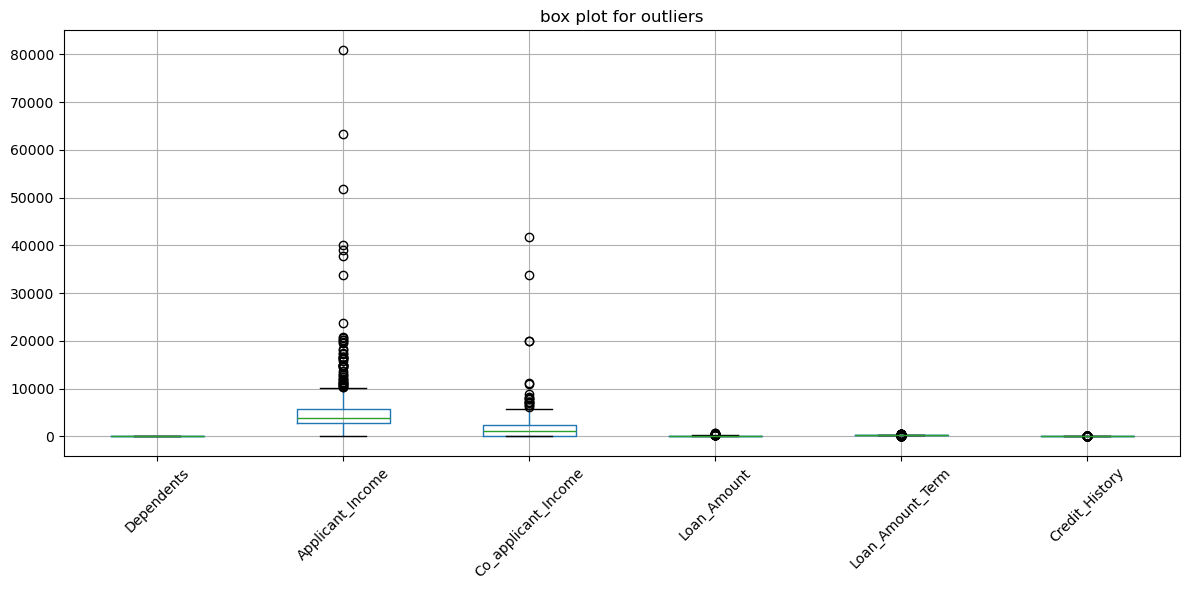

In [27]:
# to get the outliers, we use the numerica columns

plt.figure(figsize = (12, 6))

# create boxplot for the outliers
num_cols.boxplot(rot = 45)

# add tiltle

plt.title('box plot for outliers')

plt.tight_layout()
plt.show()

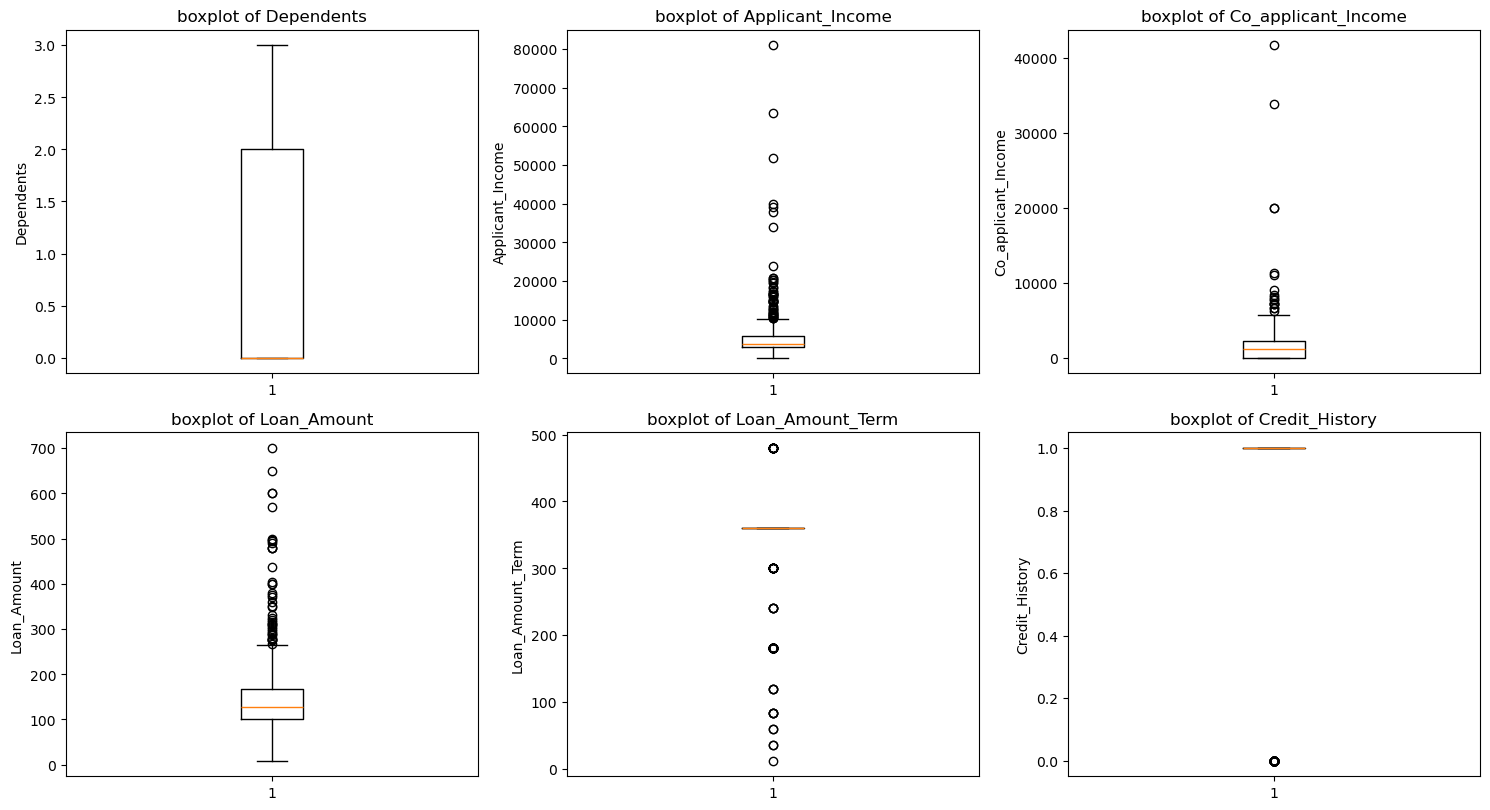

In [29]:
# want to get the box plot for each columns of the numerica columns

num_features = 7
n_cols = 3
n_rows = 3  # enough to fit 7 plots

fig, axes = plt.subplots(n_rows, n_cols, figsize = (n_cols * 5, n_rows *4))
axes = axes.flatten()

for i, col in enumerate(num_cols.columns):
    axes[i].boxplot(num_cols[col].dropna())
    axes[i].set_title(f'boxplot of {col}')
    axes[i].set_ylabel(col)

# hide unused subplots ( 2 in this case)
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


In [36]:
# create a winsorize boundaries

lower_limit = 0.05
upper_limit = 0.05

# create a winsorize column
num_cols_winsorized = num_cols.copy()
 
# applying winsorize
for col in num_cols_winsorized.columns:
    if np.issubdtype(num_cols_winsorized[col].dtype, np.number):
        num_cols_winsorized[col] = winsorize(num_cols_winsorized[col], limits = (lower_limit, upper_limit))


num_cols_winsorized.describe()

,Dependents,Applicant_Income,Co_applicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.00000
mean,0.760586,4913.416938,1389.211596,140.778502,341.530945,0.84202
std,1.012005,3174.000637,1548.752960,60.650765,52.806410,0.36502
min,0.000000,1880.000000,0.000000,56.000000,180.000000,0.00000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.00000
50%,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.00000
75%,2.000000,5795.000000,2297.250000,166.750000,360.000000,1.00000
max,3.000000,14583.000000,5000.000000,300.000000,360.000000,1.00000
